# **MariBelajar Titanic Disaster**

**Project Background**

Tenggelamnya Titanic adalah salah satu bangkai kapal paling terkenal dalam sejarah. Pada tanggal 15 April 1912, selama pelayaran perdananya, RMS Titanic yang dianggap “tidak dapat tenggelam” tenggelam setelah bertabrakan dengan gunung es. Sayangnya, sekoci yang ada tidak cukup untuk menampung semua orang, sehingga mengakibatkan kematian 1.502 dari 2.224 penumpang dan awak. Meskipun ada unsur keberuntungan dalam bertahan hidup, nampaknya beberapa kelompok orang lebih mungkin untuk bertahan hidup dibandingkan kelompok lainnya.

**Objective**:

1. e
2. f

**Actions**:

1. r
2. t
3. q

### **Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

### **Load Dataset**

In [3]:
# Read the csv file into train_data dataframe
train_dt = pd.read_csv("/content/drive/MyDrive/File EDA Data Analyst/File CSV/Titanic Disaster/train.csv")
test_dt = pd.read_csv("/content/drive/MyDrive/File EDA Data Analyst/File CSV/Titanic Disaster/test.csv")
gender = pd.read_csv("/content/drive/MyDrive/File EDA Data Analyst/File CSV/Titanic Disaster/gender_submission.csv")

#### **Train Data**

In [4]:
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Get summary statistics of the numerical columns of train_dt
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Get summary statistics of the object columns of train_dt
train_dt.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# Check number of unique values in each column of train_dt
train_dt.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# See unique values in select columns of train_dt
for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print("Unique values in {}: {}".format(col, train_dt[col].unique()))

Unique values in Survived: [0 1]
Unique values in Pclass: [3 1 2]
Unique values in Sex: ['male' 'female']
Unique values in SibSp: [1 0 3 4 2 5 8]
Unique values in Parch: [0 1 2 5 3 4 6]
Unique values in Embarked: ['S' 'C' 'Q' nan]


#### **Test Data**

In [10]:
# Check first five rows of test_dt
test_dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# Get summary statistics of the numerical columns of test_dt
test_dt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# Get summary statistics of the object columns of test_dt
test_dt.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
# Check number of unique values in each column of test_dt
test_dt.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [15]:
# See unique values in select columns of test_dt
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print("Unique values in {}: {}".format(col, test_dt[col].unique()))

Unique values in Pclass: [3 2 1]
Unique values in Sex: ['male' 'female']
Unique values in SibSp: [0 1 2 3 4 5 8]
Unique values in Parch: [0 1 3 2 4 6 5 9]
Unique values in Embarked: ['Q' 'S' 'C']


### **Data Preprocessing**

#### **Handling Missing Values**

In [16]:
# Determine number of missing values in each column of train_dt
train_dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Di train_dt, kolom Usia memiliki 177 data yang hilang, kolom Kabin memiliki 687 data yang hilang, dan kolom Embarked memiliki 2 data yang hilang.

In [17]:
# Determine number of missing values in each column of test_dt
test_dt.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Pada test_dt, kolom Usia memiliki 86 nilai yang hilang, kolom Tarif memiliki 1 nilai yang hilang, dan kolom Kabin memiliki 327 nilai yang hilang.

In [18]:
# Determine percentage of missing values in each column of train_dt
train_dt.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Di train_dt, data yang hilang pada kolom usia sebesar 19,87%, data yang hilang pada kolom kabin sebesar 77,10%, dan data yang hilang pada kolom embarked sebesar 0,22%.

In [19]:
# Determine percentage of missing values in each column of test_dt
test_dt.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Di test_dt, data yang hilang pada kolom usia sebesar 20,57%, data yang hilang pada kolom tarif sebesar 0,24%, dan data yang hilang pada kolom kabin sebesar 78,23%.

In [20]:
# Determine number of rows with missing values in train_dt
missing_train = train_dt.isna().any(axis=1).sum()
print("Jumlah data hilang train_dt : ", missing_train)

# Determine percentage of rows in train_dt with missing values
missing_train2 = train_dt.isna().any(axis=1).mean()
print("Rata data hilang train_dt : ", missing_train2)

Jumlah data hilang train_dt :  708
Rata data hilang train_dt :  0.7946127946127947


Dari 891 baris di train_dt, maka jumlah data yang hilang 708 dan rata" jumlah data yang hilang sebesar 79,46%

In [21]:
# Determine number of rows with missing values in test_dt
missing_test = test_dt.isna().any(axis=1).sum()
print("Jumlah data hilang test_dt : ", missing_test)

# Determine percentage of rows in test_dt with missing values
missing_test2 = test_dt.isna().any(axis=1).mean()
print("Rata data hilang test_dt : ", missing_test2)

Jumlah data hilang test_dt :  331
Rata data hilang test_dt :  0.7918660287081339


Dari 418 baris di test_dt, maka jumlah data yang hilang 331 dan rata" jumlah data yang hilang sebesar 79,19%

#### **Encoding Numerical Variables**

##### **Age**

<Axes: xlabel='Age', ylabel='Count'>

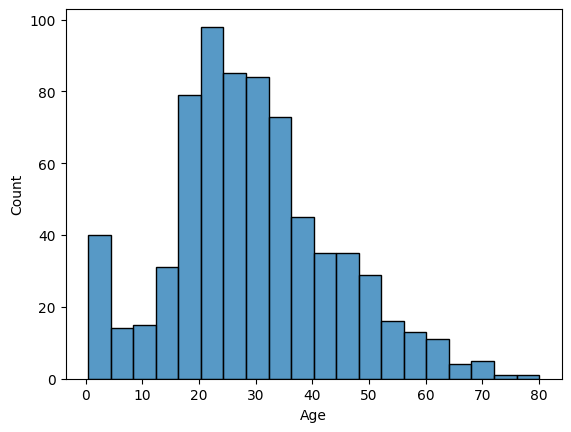

In [22]:
# Create histogram of Age column of train_dt
sns.histplot(data=train_dt, x='Age')

In [23]:
# Compute skewness of Age column of train_dt
print("Skewness of Age: {}".format(skew(train_dt['Age'])))

Skewness of Age: nan


In [24]:
# Compute the mean of the Age column of train_dt
age_mean = train_dt['Age'].mean()

# Fill missing Age values in train_dt and test_dt with age_mean
train_dt['Age'] = train_dt['Age'].fillna(age_mean)
test_dt['Age'] = test_dt['Age'].fillna(age_mean)

##### **Fare**

<Axes: xlabel='Fare', ylabel='Count'>

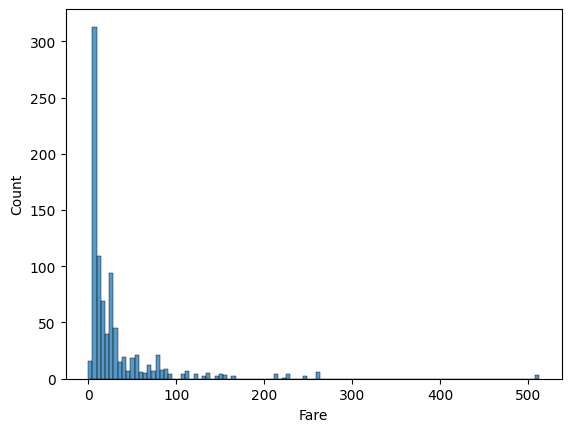

In [26]:
# Create histogram of Fare column of train_dt
sns.histplot(data=train_dt, x='Fare')

In [28]:
# Compute skewness of Fare column of train_dt
print("Skewness of Fare: {}".format(skew(train_dt['Fare'])))

Skewness of Fare: 4.7792532923723545


In [29]:
# Compute the median of the Fare column of train_dt
fare_median = train_dt['Fare'].median()

# Fill missing Fare values in train_dt with fare_median
train_dt['Fare'] = train_dt['Fare'].fillna(fare_median)

##### **Embarked**

<Axes: xlabel='Embarked', ylabel='count'>

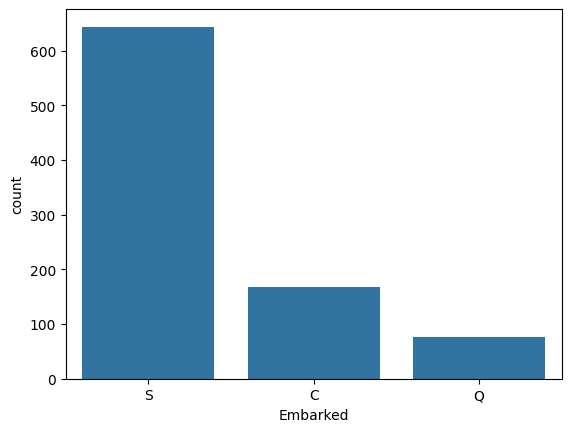

In [30]:
# Create countplot of Embarked column of train_dt
sns.countplot(data=train_dt, x='Embarked')

In [31]:
# Fill missing Embarked values in train_dt with mode 'S'
train_dt['Embarked'] = train_dt['Embarked'].fillna('S')

##### **Cabin**

In [32]:
# Drop Cabin column from train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset.drop(columns='Cabin', inplace=True)

In [33]:
# Confirm that there are no more columns with missing values in train_dt
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
# Confirm that there are no more columns with missing values in test_dt
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


#### **Encoding Categorical Variables**

##### **Sex**

In [35]:
# Encode Sex in both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

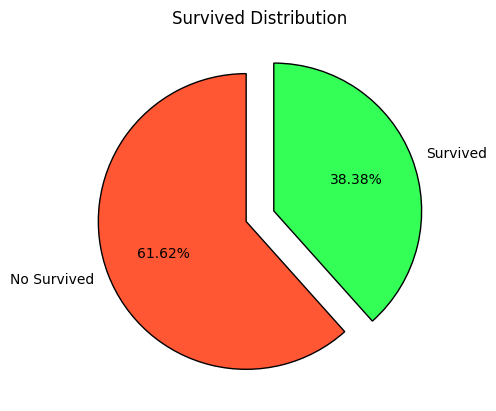

In [36]:
true_count = train_dt['Survived'].sum()
false_count = len(train_dt) - true_count
total_count = len(train_dt)
kidney_stone_percentage = (true_count / total_count) * 100
no_kidney_stone_percentage = (false_count / total_count) * 100

pie_values = [no_kidney_stone_percentage, kidney_stone_percentage]
colors = ['#FF5733', '#33FF57']

# Pie chart
plt.pie(pie_values, labels=['No Survived', 'Survived'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Survived Distribution')

plt.show()

Dari total data train_dt sebanyak 891, distribusi orang yang selamat dari tenggelamnya kapal titanic sebesar 38,38%

##### **Embarked**

In [37]:
# Encode Embarked in both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [38]:
# Get overview of train_dt
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [39]:
# Get overview of test_dt
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [40]:
# See unique values in Sex and Embarked columns of train_dt
for col in ['Sex', 'Embarked']:
    print("Unique values in {}: {}".format(col, train_dt[col].unique()))

Unique values in Sex: [0 1]
Unique values in Embarked: [0 1 2]


In [41]:
# See unique values in Sex and Embarked columns of test_dt
for col in ['Sex', 'Embarked']:
    print("Unique values in {}: {}".format(col, test_dt[col].unique()))

Unique values in Sex: [0 1]
Unique values in Embarked: [2 0 1]


#### **Feature Engineering**

##### **Title**

In [42]:
# Create Title feature for both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [43]:
# Get frequency of each title in train_dt
train_dt['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [45]:
# Check for missing values in Title column of train_dt
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [44]:
# Check for missing values in Title column of test_dt
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [46]:
# Replace Mlle with Miss, Ms with Miss, and Mme with Mrs in both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Replace any other title with 'Other'
for dataset in [train_dt, test_dt]:
    dataset.loc[~dataset['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master']), 'Title'] = 'Other'

In [47]:
# Compute survival rate by title in train_dt
train_dt[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)

,Title,Survived
0,Mrs,0.793651
1,Miss,0.702703
2,Master,0.575000
3,Other,0.347826
4,Mr,0.156673


<Axes: xlabel='Title', ylabel='Survived'>

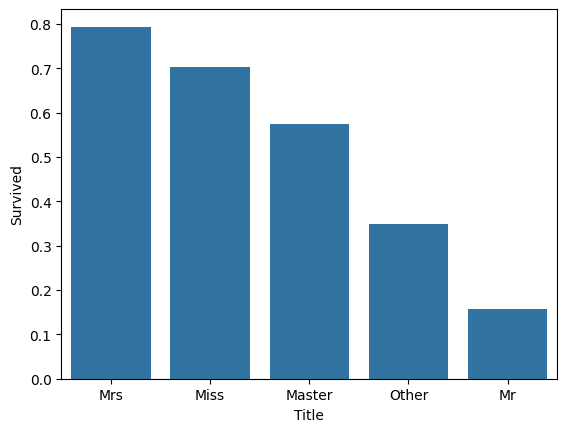

In [48]:
# Create barplot of Title versus Survived in train_dt
sns.barplot(x='Title', y='Survived', data=train_dt, errorbar=None, order=['Mrs', 'Miss', 'Master', 'Other', 'Mr'])

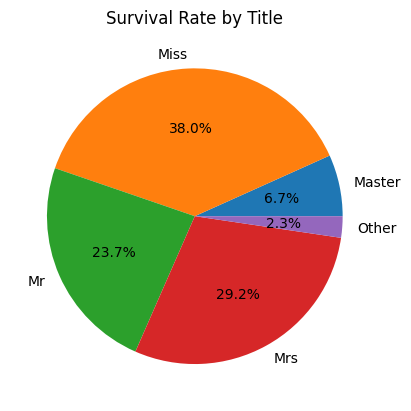

In [52]:
import matplotlib.pyplot as plt

# Hitung jumlah survival untuk setiap title
survived_counts = train_dt.groupby('Title')['Survived'].sum()

# Buat pie chart
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title('Survival Rate by Title')
plt.show()

Dari data train_dt berdasarkan hasil orang yang selamat terbanyak ada di Miss dengan hasil sebesar 38%

In [53]:
# Map titles to number codes in both train_dt and test_dt
title_mapping = {"Mrs": 0, "Miss": 1, "Master": 2, "Other": 3, "Mr": 4}
for dataset in [train_dt, test_dt]:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [54]:
# Drop Name column from train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset.drop(columns='Name', inplace=True)

##### **IsMr**

In [55]:
# Create IsMr feature for train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['IsMr'] = 0
    dataset.loc[dataset['Title'] == 4, 'IsMr'] = 1

In [56]:
# Compute survival rate by IsMr in train_dt
print (train_dt[['IsMr', 'Survived']].groupby(['IsMr'], as_index=False).mean())

   IsMr  Survived
0     0  0.697861
1     1  0.156673


Dari hasil diatas diketahui bahwa hanya 15,67% orang dengan gelar Mr yang selamat dari tenggelamnya kapal titanic

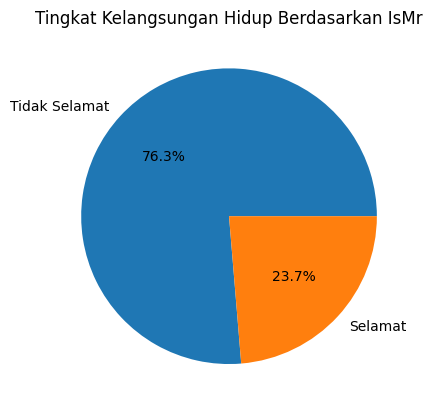

In [68]:
# Hitung jumlah penumpang selamat dan tidak selamat berdasarkan IsMr
survival_by_is_mr = train_dt.groupby('IsMr')['Survived'].value_counts().unstack()

# Buat pie chart
plt.pie(survival_by_is_mr[1], labels=['Tidak Selamat', 'Selamat'], autopct='%1.1f%%')
plt.title('Tingkat Kelangsungan Hidup Berdasarkan IsMr')
plt.show()

Dari hasil data train_dt diatas berdasarkan IsMr yang selamat sebesar 23,7% orang

<Axes: xlabel='IsMr', ylabel='Survived'>

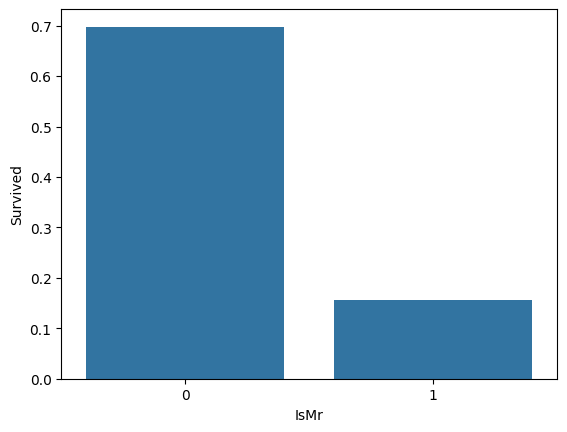

In [57]:
# Create barplot of IsMr versus Survived in train_dt
sns.barplot(x='IsMr', y='Survived', data=train_dt, errorbar=None)

##### **AgeGroup**

In [60]:
# Convert data type of Age to integer in both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['Age'] = dataset['Age'].astype(int)

# Set the number of bands (bins)
num_age_bands = 5

# Create AgeBand using pd.cut()
train_dt['AgeBand'] = pd.cut(train_dt['Age'], bins=num_age_bands)

# Compute survival rate by AgeBand
print(train_dt[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


Penumpang yang usianya termasuk dalam (64,0, 80,0] memiliki peluang bertahan hidup yang jauh lebih rendah dibandingkan penumpang yang lebih muda.

<Axes: xlabel='AgeBand', ylabel='Survived'>

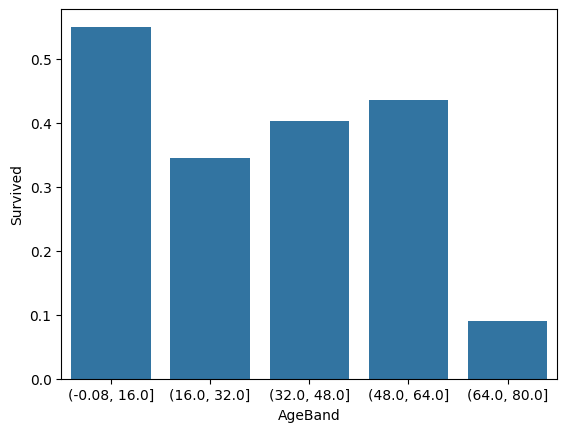

In [61]:
# Create barplot of AgeBand versus Survived in train_dt
sns.barplot(x='AgeBand', y='Survived', data=train_dt, errorbar=None)

In [62]:
# Map Age to AgeGroup in both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['AgeGroup'] = pd.Series()
    dataset.loc[dataset['Age'] <= 16, 'AgeGroup'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeGroup'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeGroup'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeGroup'] = 3
    dataset.loc[ dataset['Age'] > 64, 'AgeGroup'] = 4

In [63]:
# Drop AgeBand column from train_dt
train_dt.drop(columns='AgeBand', inplace=True)

##### **IsElderly**

In [64]:
# Create IsElderly feature for train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['IsElderly'] = 0
    dataset.loc[dataset['Age'] >= 65, 'IsElderly'] = 1

In [65]:
# Compute survival rate by IsElderly in train_dt
print (train_dt[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean())

   IsElderly  Survived
0          0  0.387500
1          1  0.090909


Dari data diatas sebesar 9% lansia diatas umur 65 yang selamat dari tenggelamnya kapal titanic

<Axes: xlabel='IsElderly', ylabel='Survived'>

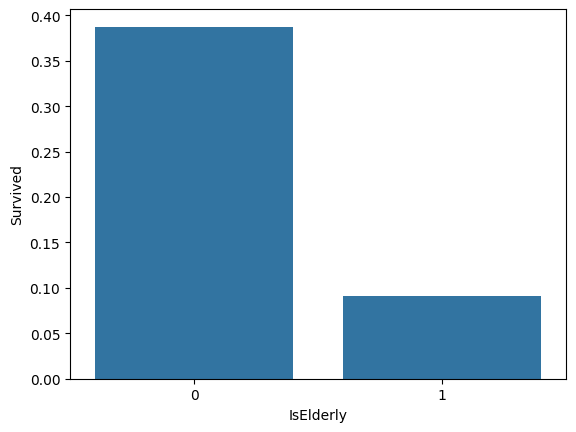

In [66]:
# Create barplot of IsElderly versus Survived in train_dt
sns.barplot(x='IsElderly', y='Survived', data=train_dt, errorbar=None)

##### **FamilySize**

In [69]:
# Create FamilySize feature for both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [70]:
# Compute survival rate by FamilySize in train_dt
print (train_dt[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<Axes: xlabel='FamilySize', ylabel='Survived'>

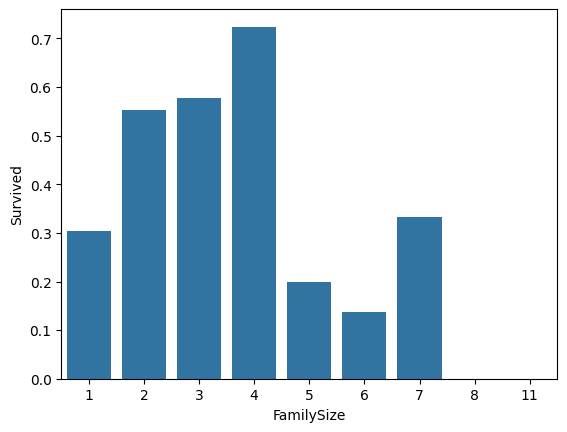

In [71]:
# Create barplot of FamilySize versus Survived in train_dt
sns.barplot(x='FamilySize', y='Survived', data=train_dt, errorbar=None)

Penumpang dengan jumlah anggota keluarga 2 hingga 4 orang memiliki peluang bertahan hidup yang lebih tinggi, sedangkan penumpang yang sendirian atau memiliki jumlah anggota keluarga yang lebih besar yaitu 5 hingga 7 orang memiliki peluang bertahan hidup yang lebih rendah.

##### **IsAlone**

In [72]:
# Create IsAlone feature for train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [73]:
# Compute survival rate by IsAlone in train_dt
print (train_dt[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


<Axes: xlabel='IsAlone', ylabel='Survived'>

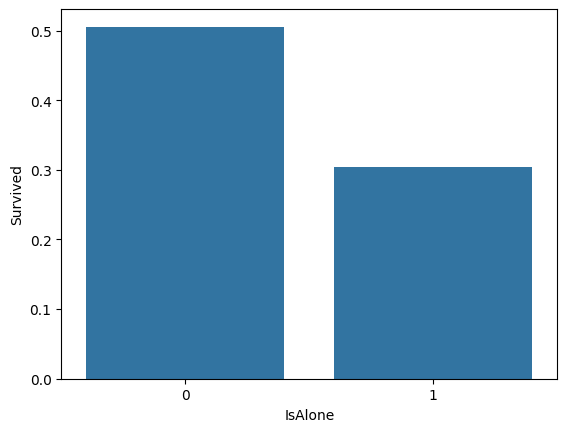

In [74]:
# Create barplot of IsAlone versus Survived in train_dt
sns.barplot(x='IsAlone', y='Survived', data=train_dt, errorbar=None)

##### **FareGroup**

In [75]:
# Set the number of quantiles
num_fare_quantiles = 4

# Create FareBand using pd.cut()
train_dt['FareBand'] = pd.qcut(train_dt['Fare'], q=num_fare_quantiles)

# Compute survival rate by AgeBand
print(train_dt[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


<Axes: xlabel='FareBand', ylabel='Survived'>

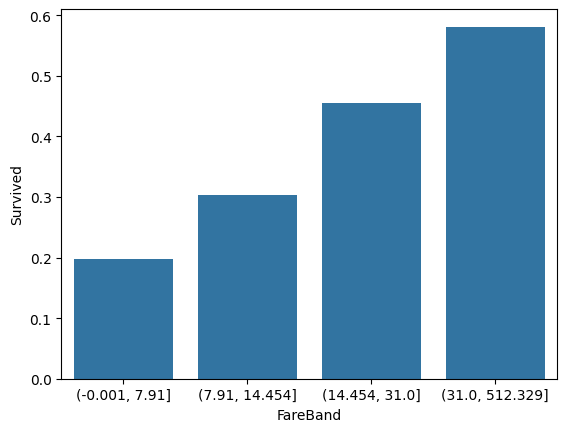

In [76]:
# Create barplot of FareBand versus Survived in train_dt
sns.barplot(x='FareBand', y='Survived', data=train_dt, errorbar=None)

In [77]:
# Map Fare to FareGroup in both train_dt and test_dt
for dataset in [train_dt, test_dt]:
    dataset['FareGroup'] = pd.Series()
    dataset.loc[dataset['Fare'] <= 7.91, 'FareGroup'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'FareGroup'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'FareGroup'] = 2
    dataset.loc[ dataset['Fare'] > 31.0, 'FareGroup'] = 3

In [78]:
# Drop FareBand column from train_dt
train_dt.drop(columns='FareBand', inplace=True)

In [79]:
# Check first few rows of train_dt
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
0,1,0,3,0,22,1,0,A/5 21171,7.2500,0,4,1,1,0,2,0,0
1,2,1,1,1,38,1,0,PC 17599,71.2833,1,0,0,2,0,2,0,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,1,1,1
3,4,1,1,1,35,1,0,113803,53.1000,0,0,0,2,0,2,0,3
4,5,0,3,0,35,0,0,373450,8.0500,0,4,1,2,0,1,1,1


In [80]:
# Check first few rows of test_dt
test_dt.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
0,892,3,0,34,0,0,330911,7.8292,2,4,1,2,0,1,1,0
1,893,3,1,47,1,0,363272,7.0000,0,0,0,2,0,2,0,0
2,894,2,0,62,0,0,240276,9.6875,2,4,1,3,0,1,1,1
3,895,3,0,27,0,0,315154,8.6625,0,4,1,1,0,1,1,1
4,896,3,1,22,1,1,3101298,12.2875,0,0,0,1,0,3,0,1


PassengerId yang bersifat unik untuk setiap penumpang dan hanya sebagai pengidentifikasi, tidak berkontribusi terhadap prediksi kelangsungan hidup setiap penumpang. Akibatnya, itu harus dihapus dari train_data dan test_data. Ticket yang merepresentasikan nomor tiket memiliki 681 nilai unik di train_data yang memiliki total 891 baris. Ini mungkin menyimpan beberapa petunjuk, tetapi mirip dengan Cabin, itu dapat dihapus dari train_data dan test_data. Informasi relevan apa pun yang ada di kolom ini diharapkan disediakan dengan lebih baik oleh Pclass dan Fare. Pclass mewakili kelas tiket. Bertahan adalah variabel target sehingga harus dihilangkan dari train_data. Usia dapat dihilangkan dari train_data dan test_data karena skalanya berbeda dari fitur lainnya dan AgeGroup telah dibuat. Tarif dapat dihapus dari train_data dan test_data karena skalanya berbeda dari fitur lainnya dan FareGroup sudah dibuat.

In [112]:
# Define X_train, X_test, and y_train
X_train = train_dt.drop(columns=['PassengerId', 'Survived', 'Age', 'Ticket', 'Fare'], inplace=False)
X_test = test_dt.drop(columns=['PassengerId', 'Age', 'Ticket', 'Fare'], inplace=False)
y_train = train_dt['Survived']
y_test = test_dt['Age']

In [113]:
# Check shape of X_train, X_test, and y_train
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (891, 12)
Shape of y_train:  (891,)
Shape of X_test:  (418, 12)
Shape of y_test:  (418,)


In [114]:
# Check remaining features in X_train
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup'],
      dtype='object')

In [115]:
# Check remaining features in X_test
X_test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup'],
      dtype='object')

#### **Exploratory Data Analysis**

##### **Relationships Among Features**

In [116]:
# Create a correlation matrix of train_features
correlation_matrix_features = X_train.corr()
correlation_matrix_features

,Pclass,Sex,SibSp,Parch,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
Pclass,1.000000,-0.131900,0.083081,0.018443,0.045702,0.137035,0.142698,-0.358005,-0.077787,0.065997,0.135207,-0.628459
Sex,-0.131900,1.000000,0.114631,0.245489,0.116569,-0.944195,-0.867334,-0.071125,-0.082477,0.200988,-0.303646,0.248940
SibSp,0.083081,0.114631,1.000000,0.414838,-0.059961,-0.202135,-0.250489,-0.218846,-0.043834,0.890712,-0.584471,0.394248
Parch,0.018443,0.245489,0.414838,1.000000,-0.078665,-0.330014,-0.333905,-0.134014,-0.027725,0.783111,-0.583398,0.393048
Embarked,0.045702,0.116569,-0.059961,-0.078665,1.000000,-0.093645,-0.113971,-0.051975,0.048390,-0.080281,0.017807,-0.091096
Title,0.137035,-0.944195,-0.202135,-0.330014,-0.093645,1.000000,0.944440,0.097245,0.083549,-0.303022,0.411560,-0.316181
IsMr,0.142698,-0.867334,-0.250489,-0.333905,-0.113971,0.944440,1.000000,0.145364,0.074497,-0.338014,0.396920,-0.323790
AgeGroup,-0.358005,-0.071125,-0.218846,-0.134014,-0.051975,0.097245,0.145364,1.000000,0.373544,-0.216525,0.124650,0.096773
IsElderly,-0.077787,-0.082477,-0.043834,-0.027725,0.048390,0.083549,0.074497,0.373544,1.000000,-0.043810,0.049234,0.013137
FamilySize,0.065997,0.200988,0.890712,0.783111,-0.080281,-0.303022,-0.338014,-0.216525,-0.043810,1.000000,-0.690922,0.465815


<Axes: >

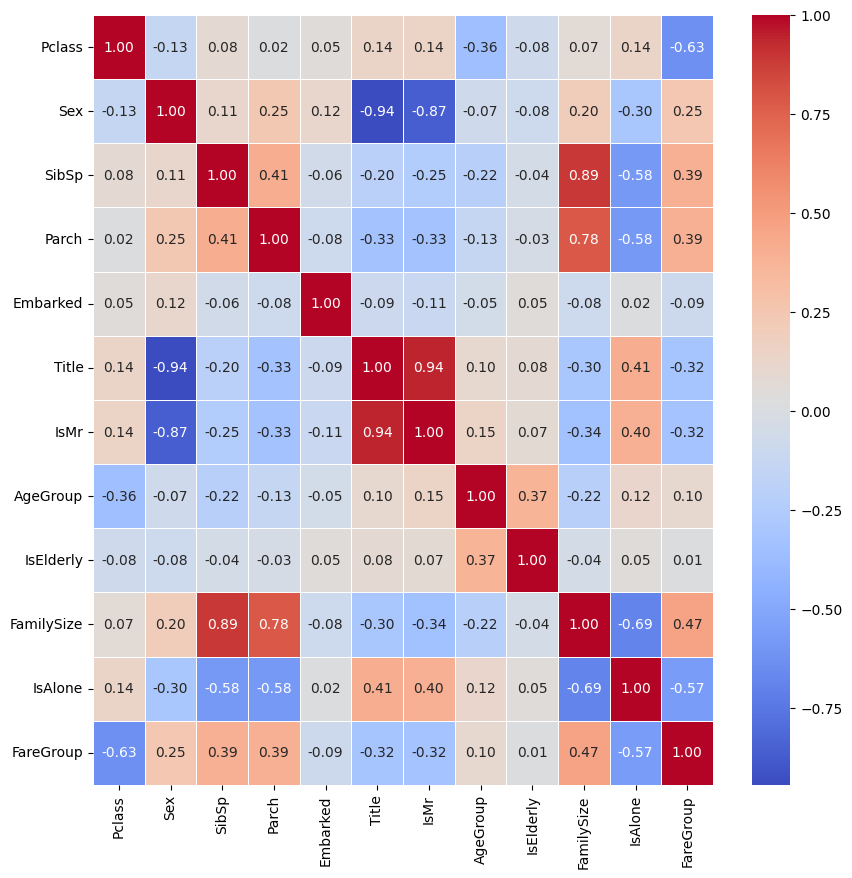

In [117]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [118]:
# Set correlation thresholds
highly_correlated_threshold = 0.7
moderately_correlated_threshold = 0.5

# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs = []

# Define function to determine correlation level
def get_correlation_level(correlation_value):
    if abs(correlation_value) >= highly_correlated_threshold:
        return 'Highly correlated'
    elif abs(correlation_value) >= moderately_correlated_threshold:
        return 'Moderately correlated'
    else:
        return None

# Iterate through pairs of features and accumulate moderately and highly correlated pairs
for i in range(len(correlation_matrix_features.columns)):
    for j in range(i + 1, len(correlation_matrix_features.columns)):
        feature1, feature2 = correlation_matrix_features.columns[i], correlation_matrix_features.columns[j]
        correlation_value = correlation_matrix_features.loc[feature1, feature2]
        correlation_level = get_correlation_level(correlation_value)

        if correlation_level is not None:
            correlated_pairs.append({'Feature 1': feature1,
                                     'Feature 2': feature2,
                                     'Correlation Value': correlation_value,
                                     'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_df = pd.DataFrame(correlated_pairs)

print(correlated_pairs_df)

    Feature 1   Feature 2  Correlation Value      Correlation Level
0      Pclass   FareGroup          -0.628459  Moderately correlated
1         Sex       Title          -0.944195      Highly correlated
2         Sex        IsMr          -0.867334      Highly correlated
3       SibSp  FamilySize           0.890712      Highly correlated
4       SibSp     IsAlone          -0.584471  Moderately correlated
5       Parch  FamilySize           0.783111      Highly correlated
6       Parch     IsAlone          -0.583398  Moderately correlated
7       Title        IsMr           0.944440      Highly correlated
8  FamilySize     IsAlone          -0.690922  Moderately correlated
9     IsAlone   FareGroup          -0.568942  Moderately correlated


#### **Relationships Between Target Variable and Each Feature**

In [121]:
# Create a matrix of correlation between target variable and each feature
combined_train = pd.concat([X_train, y_train], axis=1)
correlation_with_target = combined_train.corr().iloc[:-1, -1].sort_values(ascending=False)
correlation_with_target

Sex           0.543351
FareGroup     0.295875
Embarked      0.106811
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
AgeGroup     -0.044492
IsElderly    -0.067344
IsAlone      -0.203367
Pclass       -0.338481
IsMr         -0.549199
Title        -0.565716
Name: Survived, dtype: float64

In [122]:
# Create a matrix of correlation between target variable and each feature
combined_test = pd.concat([X_test, y_test], axis=1)
correlation_with_target2 = combined_test.corr().iloc[:-1, -1].sort_values(ascending=False)
correlation_with_target2

AgeGroup      0.935589
FareGroup     0.248033
IsElderly     0.227576
IsMr          0.117219
Embarked      0.079774
Title         0.017177
Sex           0.004003
IsAlone      -0.028777
Parch        -0.044889
FamilySize   -0.074292
SibSp        -0.076721
Pclass       -0.452230
Name: Age, dtype: float64

In [123]:
# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs_target = []

# Iterate through features and calculate correlation with the target variable 'Survived'
for feature in correlation_with_target.index:
    correlation_value = correlation_with_target.loc[feature]
    correlation_level = get_correlation_level(correlation_value)

    if correlation_level is not None:
        correlated_pairs_target.append({'Feature': feature,
                                        'Target Variable': 'Survived',
                                        'Correlation Value': correlation_value,
                                        'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_target_df = pd.DataFrame(correlated_pairs_target)

print(correlated_pairs_target_df)

  Feature Target Variable  Correlation Value      Correlation Level
0     Sex        Survived           0.543351  Moderately correlated
1    IsMr        Survived          -0.549199  Moderately correlated
2   Title        Survived          -0.565716  Moderately correlated


In [124]:
# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs_target2 = []

# Iterate through features and calculate correlation with the target variable 'Survived'
for feature in correlation_with_target.index:
    correlation_value = correlation_with_target.loc[feature]
    correlation_level = get_correlation_level(correlation_value)

    if correlation_level is not None:
        correlated_pairs_target2.append({'Feature': feature,
                                        'Target Variable': 'Survived',
                                        'Correlation Value': correlation_value,
                                        'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_target_df2 = pd.DataFrame(correlated_pairs_target2)

print(correlated_pairs_target_df2)

  Feature Target Variable  Correlation Value      Correlation Level
0     Sex        Survived           0.543351  Moderately correlated
1    IsMr        Survived          -0.549199  Moderately correlated
2   Title        Survived          -0.565716  Moderately correlated


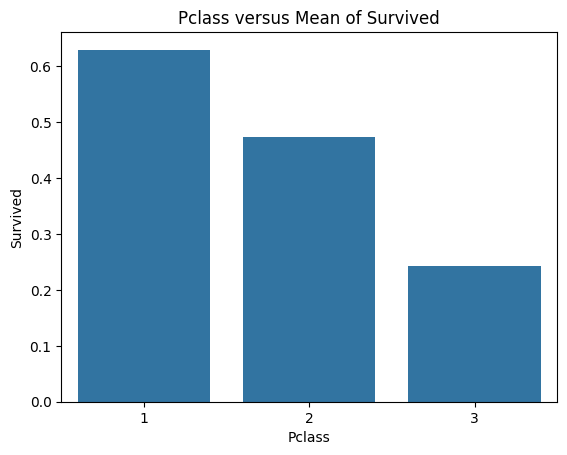

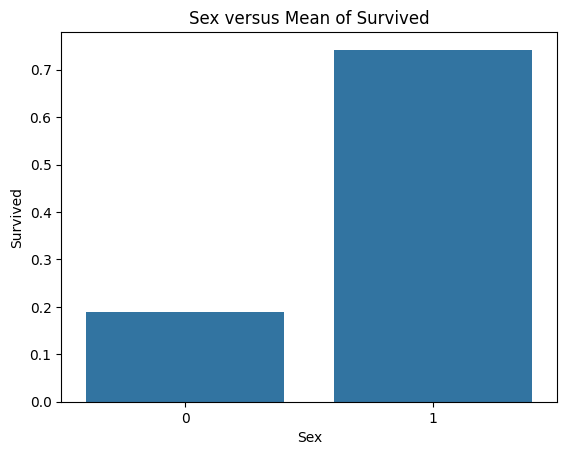

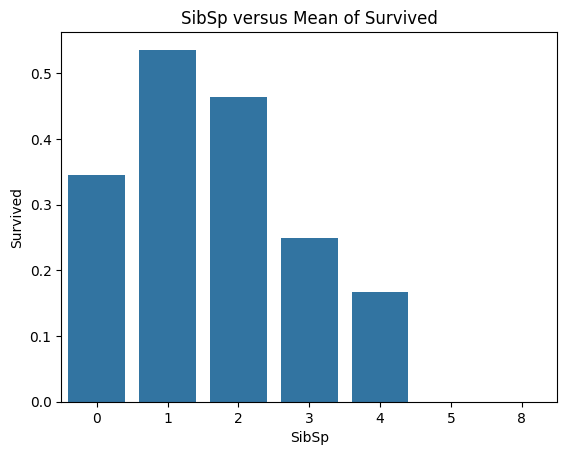

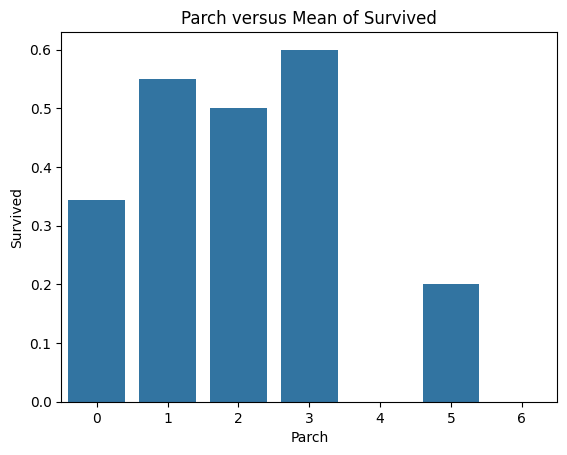

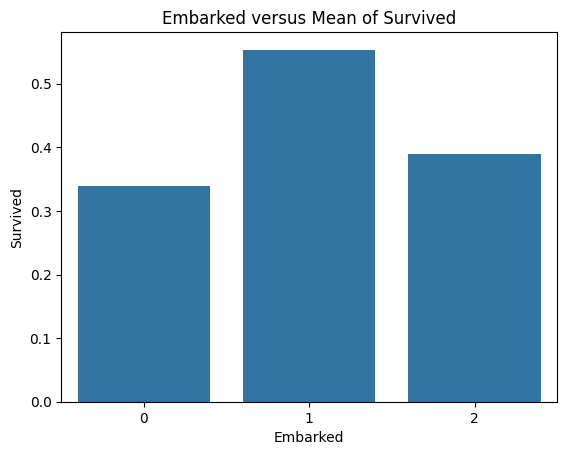

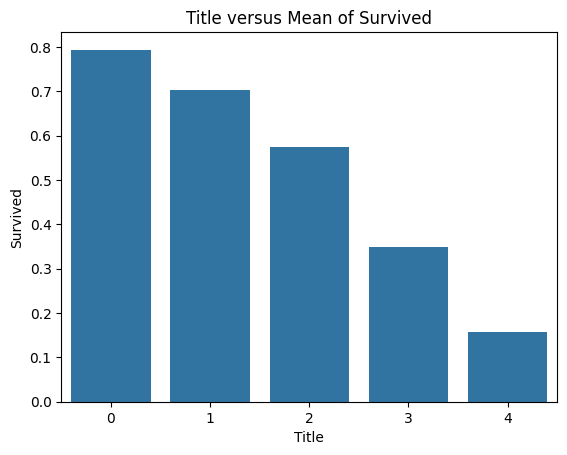

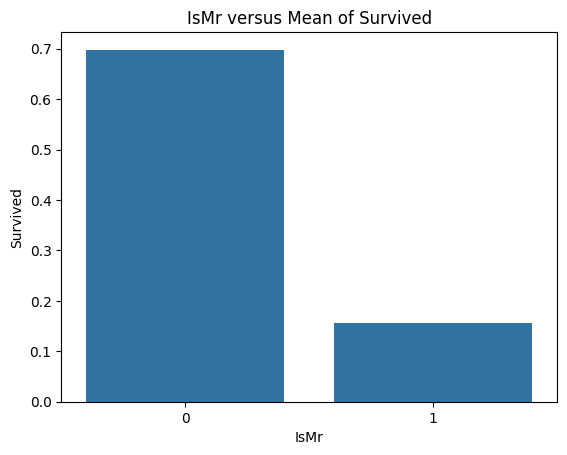

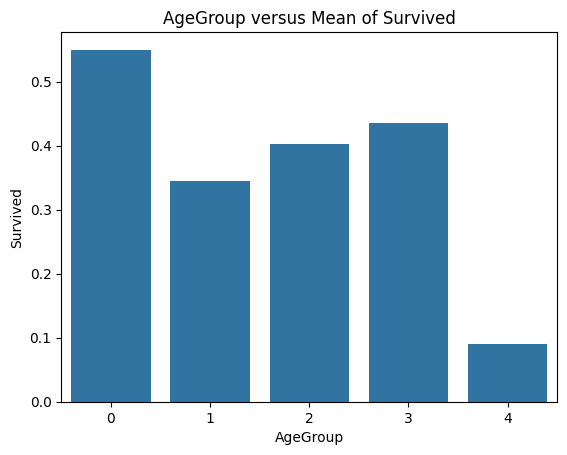

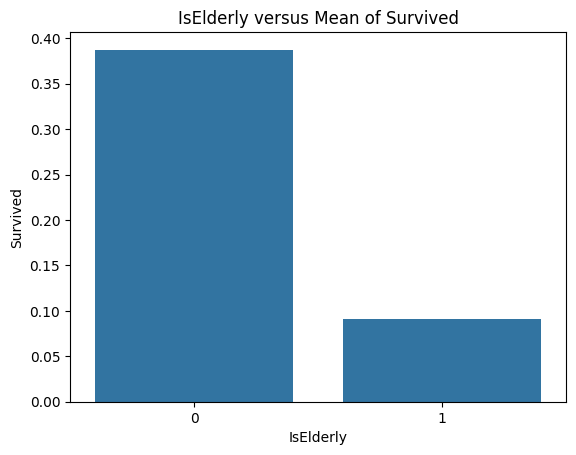

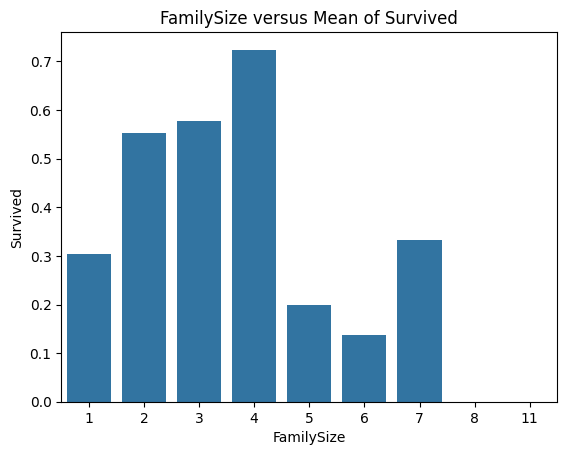

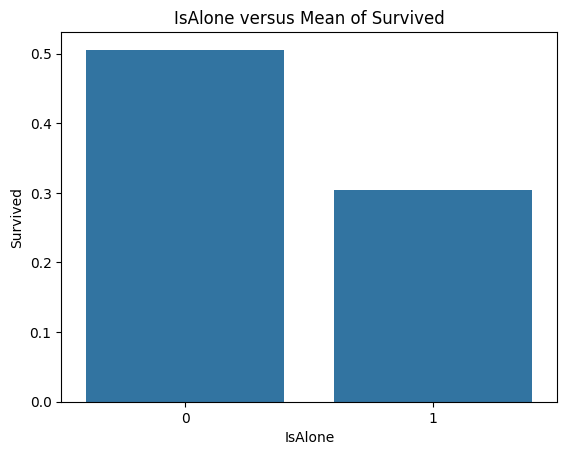

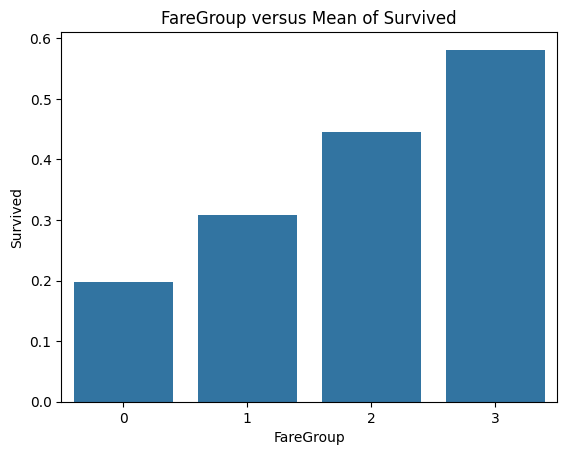

In [125]:
# Iterate over each feature in X_train
for feature in X_train.columns:
    # Create barplot for current feature versus Survived
    sns.barplot(x=X_train[feature], y=y_train, errorbar=None)
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(f'{feature} versus Mean of Survived')
    plt.show()

#### **Model Development and Evaluation**

##### **Model 1 - Logistic Regression, 12 Features, No Cross-Validation, No Hyperparameter Tuning**

In [137]:
from sklearn.impute import SimpleImputer

# Select features to be used
features_model1 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model1 = X_train[features_model1]
y_train_model1 = y_train
X_test_model1 = X_test[features_model1]
y_test_model1 = y_test

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
X_train_model1_imputed = imputer.fit_transform(X_train_model1)

# Transform the test data using the fitted imputer
X_test_model1_imputed = imputer.transform(X_test_model1)

# Instantiate model
model1 = LogisticRegression()

# Train model
model1.fit(X_train_model1_imputed, y_train_model1)

# Get the coefficients of the model
coefficients_model1 = model1.coef_[0]

# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df_model1 = pd.DataFrame({'Feature': X_train_model1.columns, 'Coefficient': coefficients_model1})

# Sort the coefficients to identify the most important features
coefficients_df_model1 = coefficients_df_model1.reindex(coefficients_df_model1['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

# Print coefficients
print(coefficients_df_model1)
print("\n")

# Compute training set accuracy of model
train_accuracy_model1 = model1.score(X_train_model1_imputed, y_train_model1)

# Print training set accuracy of model
print ("Training set accuracy:", train_accuracy_model1)

# Predict on the test set using the model
y_pred_model1 = model1.predict(X_test_model1_imputed)

       Feature  Coefficient
0       Pclass    -0.944040
1        Title    -0.802429
2         IsMr    -0.541504
3     AgeGroup    -0.519382
4      IsAlone    -0.364732
5   FamilySize    -0.317381
6        SibSp    -0.261600
7     Embarked     0.240587
8    FareGroup     0.208249
9    IsElderly    -0.205648
10         Sex    -0.194167
11       Parch    -0.062707


Training set accuracy: 0.8148148148148148


In [138]:
# Create submission file
output_model1 = pd.DataFrame({'PassengerId': test_dt['PassengerId'], 'Survived': y_pred_model1})
output_model1.to_csv('submission_model1.csv', index=False)

# Check contents of submission file
submission_model1 = pd.read_csv('submission_model1.csv')
submission_model1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [139]:
from sklearn.metrics import accuracy_score

# Mengukur akurasi dari model
test_accuracy_model1 = accuracy_score(y_test, y_pred_model1)

# Mencetak akurasi pada data uji
print("Akurasi pada data uji:", test_accuracy_model1)

Akurasi pada data uji: 0.011961722488038277


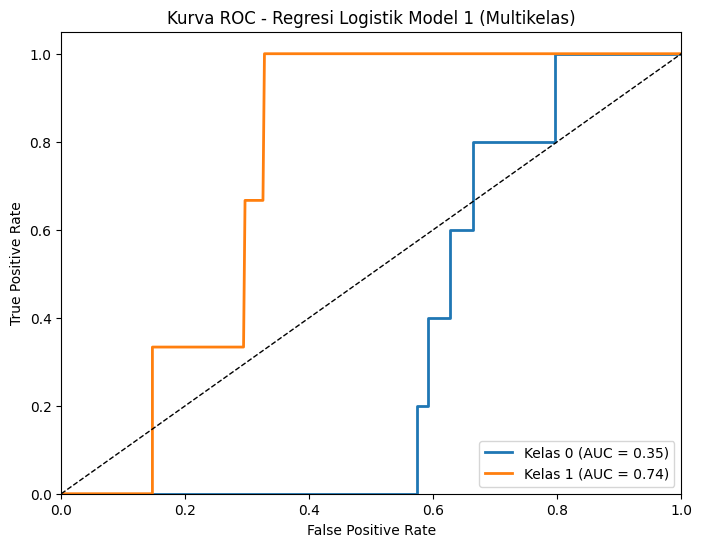

In [140]:
from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba_model1 = model1.predict_proba(X_test_model1_imputed)

# Inisialisasi variabel untuk menyimpan FPR, TPR, dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Mendapatkan jumlah kelas
n_classes = y_pred_proba_model1.shape[1]

# Menghitung kurva ROC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_model1, y_pred_proba_model1[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Kelas %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Regresi Logistik Model 1 (Multikelas)')
plt.legend(loc="lower right")
plt.show()


##### **Model 2 - K-Nearest Neighbors Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning**

In [165]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Select features to be used
features_model2 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model2 = X_train[features_model2]
y_train_model2 = y_train
X_test_model2 = X_test[features_model2]
y_test_model2 = y_test

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
X_train_model2_imputed = imputer.fit_transform(X_train_model2)

# Transform the test data using the fitted imputer
X_test_model2_imputed = imputer.transform(X_test_model2)

# Instantiate model
model2 = KNeighborsClassifier()

# Train model
model2.fit(X_train_model2_imputed, y_train_model2)

# Compute training set accuracy of model
train_accuracy_model2 = model2.score(X_train_model2_imputed, y_train_model2)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model2)

# Predict on the test set using the model
y_pred_model2 = model2.predict(X_test_model2_imputed)

Training set accuracy: 0.8540965207631874


In [142]:
# Create submission file
output_model2 = pd.DataFrame({'PassengerId': test_dt['PassengerId'], 'Survived': y_pred_model2})
output_model2.to_csv('submission_model2.csv', index=False)

# Check contents of submission file
submission_model2 = pd.read_csv('submission_model2.csv')
submission_model2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [143]:
from sklearn.metrics import accuracy_score

# Mengukur akurasi dari model
test_accuracy_model2 = accuracy_score(y_test, y_pred_model2)

# Mencetak akurasi pada data uji
print("Akurasi pada data uji:", test_accuracy_model2)

Akurasi pada data uji: 0.007177033492822967


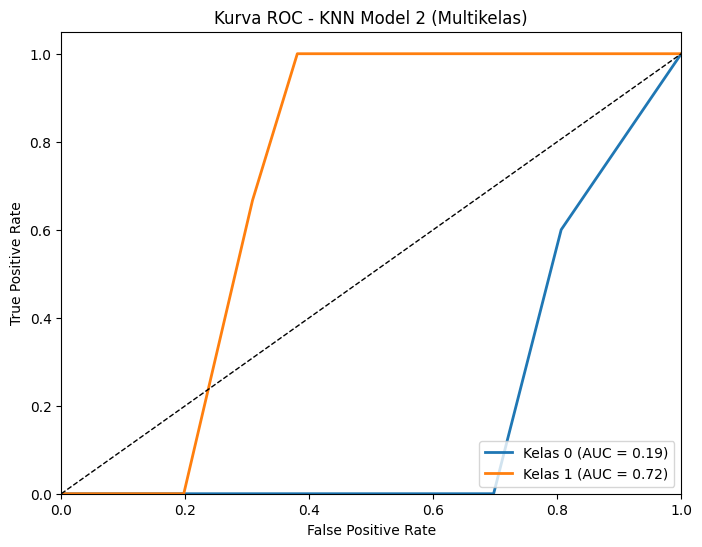

In [144]:
from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba_model2 = model2.predict_proba(X_test_model2_imputed)

# Inisialisasi variabel untuk menyimpan FPR, TPR, dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Mendapatkan jumlah kelas
n_classes = y_pred_proba_model2.shape[1]

# Menghitung kurva ROC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_model2, y_pred_proba_model2[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Kelas %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - KNN Model 2 (Multikelas)')
plt.legend(loc="lower right")
plt.show()


##### **Model 3 - Decision Tree Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning**

In [153]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Select features to be used
features_model3 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model3 = X_train[features_model3]
y_train_model3 = y_train
X_test_model3 = X_test[features_model3]
y_test_model3 = y_test

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
X_train_model3_imputed = imputer.fit_transform(X_train_model3)

# Transform the test data using the fitted imputer
X_test_model3_imputed = imputer.transform(X_test_model3)

# Instantiate model
model3 = DecisionTreeClassifier(random_state=42)

# Train model
model3.fit(X_train_model3_imputed, y_train_model3)

# Get the feature importances of the model
feature_importances_model3 = model3.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model3 = pd.DataFrame({'Feature': X_train_model3.columns, 'Importance': feature_importances_model3})

# Sort the feature importances to identify the most important features
importance_df_model3 = importance_df_model3.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print feature importances
print(importance_df_model3)
print("\n")

# Compute training set accuracy of model
train_accuracy_model3 = model3.score(X_train_model3_imputed, y_train_model3)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model3)

# Predict on the test set using the model
y_pred_model3 = model3.predict(X_test_model3_imputed)

       Feature  Importance
0        Title    0.489012
1       Pclass    0.193708
2   FamilySize    0.089988
3    FareGroup    0.057209
4     AgeGroup    0.042759
5     Embarked    0.034263
6        SibSp    0.024542
7      IsAlone    0.024113
8        Parch    0.016593
9          Sex    0.012590
10        IsMr    0.009584
11   IsElderly    0.005639


Training set accuracy: 0.8922558922558923


In [154]:
# Create submission file
output_model3 = pd.DataFrame({'PassengerId': test_dt['PassengerId'], 'Survived': y_pred_model3})
output_model3.to_csv('submission_model3.csv', index=False)

# Check contents of submission file
submission_model3 = pd.read_csv('submission_model3.csv')
submission_model3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [155]:
from sklearn.metrics import accuracy_score

# Mengukur akurasi dari model
test_accuracy_model3 = accuracy_score(y_test, y_pred_model3)

# Mencetak akurasi pada data uji
print("Akurasi pada data uji:", test_accuracy_model3)

Akurasi pada data uji: 0.007177033492822967


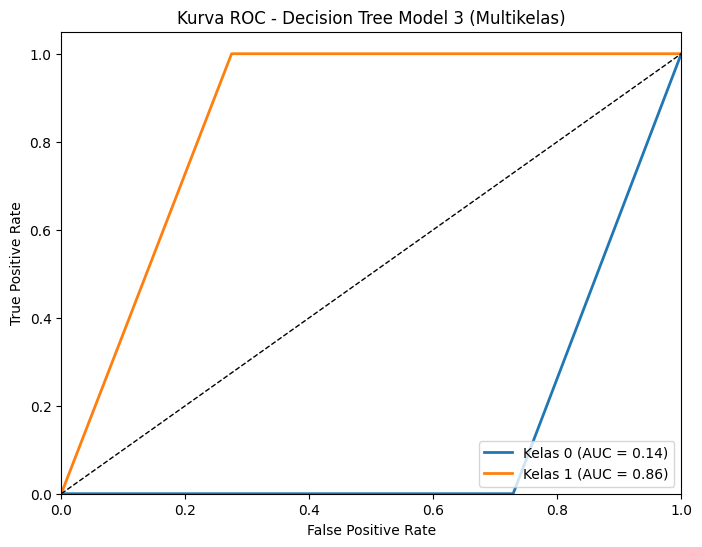

In [156]:
from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba_model3 = model3.predict_proba(X_test_model3_imputed)

# Inisialisasi variabel untuk menyimpan FPR, TPR, dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Mendapatkan jumlah kelas
n_classes = y_pred_proba_model3.shape[1]

# Menghitung kurva ROC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_model3, y_pred_proba_model3[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Kelas %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Decision Tree Model 3 (Multikelas)')
plt.legend(loc="lower right")
plt.show()


##### **Model 4 - Random Forest Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning**

In [157]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Select features to be used
features_model4 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model4 = X_train[features_model4]
y_train_model4 = y_train
X_test_model4 = X_test[features_model4]
y_test_model4 = y_test

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
X_train_model4_imputed = imputer.fit_transform(X_train_model4)

# Transform the test data using the fitted imputer
X_test_model4_imputed = imputer.transform(X_test_model4)

# Instantiate model
model4 = RandomForestClassifier(random_state=42)

# Train model
model4.fit(X_train_model4_imputed, y_train_model4)

# Get the feature importances of the model
feature_importances_model4 = model4.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model4 = pd.DataFrame({'Feature': X_train_model4.columns, 'Importance': feature_importances_model4})

# Sort the feature importances to identify the most important features
importance_df_model4 = importance_df_model4.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print feature importances
print(importance_df_model4)
print("\n")

# Compute training set accuracy of model
train_accuracy_model4 = model4.score(X_train_model4_imputed, y_train_model4)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model4)

# Predict on the test set using the model
y_pred_model4 = model4.predict(X_test_model4_imputed)

       Feature  Importance
0        Title    0.207566
1          Sex    0.150230
2       Pclass    0.133227
3         IsMr    0.099615
4    FareGroup    0.095278
5     AgeGroup    0.086592
6   FamilySize    0.079024
7     Embarked    0.052919
8        SibSp    0.049255
9        Parch    0.031240
10     IsAlone    0.012319
11   IsElderly    0.002735


Training set accuracy: 0.8922558922558923


In [158]:
# Create submission file
output_model4 = pd.DataFrame({'PassengerId': test_dt['PassengerId'], 'Survived': y_pred_model4})
output_model4.to_csv('submission_model4.csv', index=False)

# Check contents of submission file
submission_model4 = pd.read_csv('submission_model4.csv')
submission_model4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [159]:
from sklearn.metrics import accuracy_score

# Mengukur akurasi dari model
test_accuracy_model4 = accuracy_score(y_test, y_pred_model4)

# Mencetak akurasi pada data uji
print("Akurasi pada data uji:", test_accuracy_model4)

Akurasi pada data uji: 0.007177033492822967


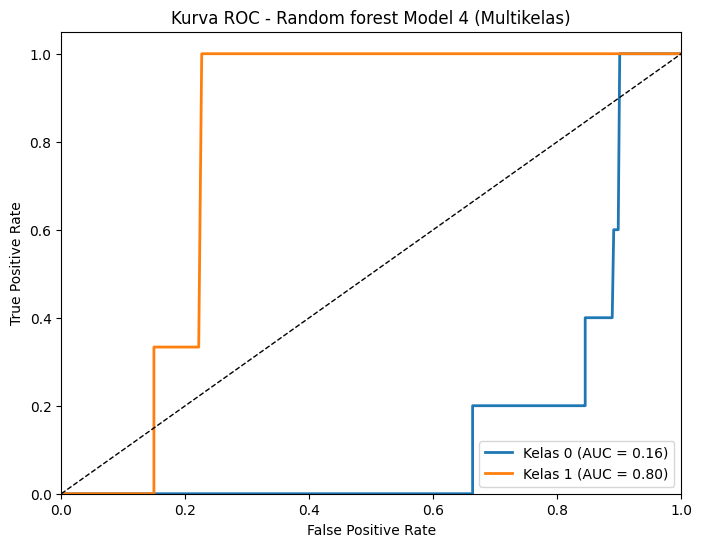

In [160]:
from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba_model4 = model4.predict_proba(X_test_model4_imputed)

# Inisialisasi variabel untuk menyimpan FPR, TPR, dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Mendapatkan jumlah kelas
n_classes = y_pred_proba_model4.shape[1]

# Menghitung kurva ROC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_model4, y_pred_proba_model4[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Kelas %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Random forest Model 4 (Multikelas)')
plt.legend(loc="lower right")
plt.show()


##### **Model 5 - Gradient Boosting Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning**

In [161]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

# Select features to be used
features_model5 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model5 = X_train[features_model5]
y_train_model5 = y_train
X_test_model5 = X_test[features_model5]
y_test_model5 = y_test

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
X_train_model5_imputed = imputer.fit_transform(X_train_model5)

# Transform the test data using the fitted imputer
X_test_model5_imputed = imputer.transform(X_test_model5)

# Instantiate model
model5 = GradientBoostingClassifier(random_state=42)

# Train model
model5.fit(X_train_model5_imputed, y_train_model5)

# Get the feature importances of the model
feature_importances_model5 = model5.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model5 = pd.DataFrame({'Feature': X_train_model5.columns, 'Importance': feature_importances_model5})

# Sort the feature importances to identify the most important features
importance_df_model5 = importance_df_model5.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print feature importances
print(importance_df_model5)
print("\n")

# Compute training set accuracy of model
train_accuracy_model5 = model5.score(X_train_model5_imputed, y_train_model5)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model5)

# Predict on the test set using the model
y_pred_model5 = model5.predict(X_test_model5_imputed)

       Feature  Importance
0        Title    0.565826
1       Pclass    0.226558
2   FamilySize    0.094034
3    FareGroup    0.037379
4     AgeGroup    0.021617
5     Embarked    0.016640
6        SibSp    0.015070
7          Sex    0.013378
8         IsMr    0.004591
9        Parch    0.003388
10   IsElderly    0.000934
11     IsAlone    0.000587


Training set accuracy: 0.8529741863075196


In [162]:
# Create submission file
output_model5 = pd.DataFrame({'PassengerId': test_dt['PassengerId'], 'Survived': y_pred_model5})
output_model5.to_csv('submission_model5.csv', index=False)

# Check contents of submission file
submission_model5 = pd.read_csv('submission_model5.csv')
submission_model5

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [163]:
from sklearn.metrics import accuracy_score

# Mengukur akurasi dari model
test_accuracy_model5 = accuracy_score(y_test, y_pred_model5)

# Mencetak akurasi pada data uji
print("Akurasi pada data uji:", test_accuracy_model5)

Akurasi pada data uji: 0.007177033492822967


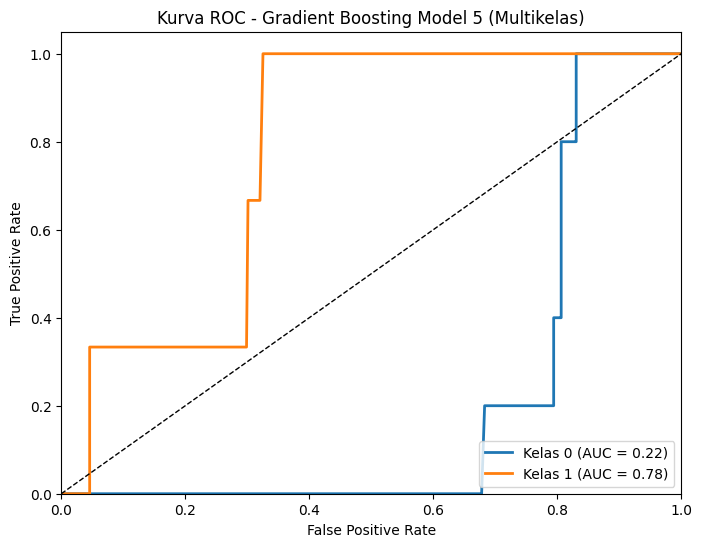

In [166]:
from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk setiap kelas
y_pred_proba_model5 = model5.predict_proba(X_test_model5_imputed)

# Inisialisasi variabel untuk menyimpan FPR, TPR, dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

# Mendapatkan jumlah kelas
n_classes = y_pred_proba_model5.shape[1]

# Menghitung kurva ROC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_model5, y_pred_proba_model5[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Kelas %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Gradient Boosting Model 5 (Multikelas)')
plt.legend(loc="lower right")
plt.show()


#### **Results and Findings**

In [167]:
# Create lists of results
model_numbers = [1, 2, 3, 4, 5]
classifiers = ['Logistic Regression',
               'K-Nearest Neighbors Classifier',
               'Decision Tree Classifier',
               'Random Forest Classifier',
               'Gradient Boosting Classifier']
feature_counts = [12, 12, 12, 12, 12]
with_cv_statuses = ['No', 'No', 'No', 'No', 'No']
with_hp_statuses = ['No', 'No', 'No', 'No', 'No']
mean_cross_val_accuracies = ['Not applicable',
                             'Not applicable',
                             'Not applicable',
                             'Not applicable',
                             'Not applicable',
                             ]
train_accuracies = [train_accuracy_model1,
                    train_accuracy_model2,
                    train_accuracy_model3,
                    train_accuracy_model4,
                    train_accuracy_model5,
                    ]
test_accuracies = [0.77990, 0.74880, 0.75119, 0.74880, 0.76794]

# Create the DataFrame
data = {
    'Model Number': model_numbers,
    'Classifier': classifiers,
    'Number of Features': feature_counts,
    'With Cross-Validation?': with_cv_statuses,
    'With Hyperparameter Tuning?': with_hp_statuses,
    'Mean Cross-Validation Accuracy': mean_cross_val_accuracies,
    'Training Set Accuracy': train_accuracies,
    'Test Set Accuracy (according to Kaggle)': test_accuracies
}

results = pd.DataFrame(data)

# Print results
display(results)

,Model Number,Classifier,Number of Features,With Cross-Validation?,With Hyperparameter Tuning?,Mean Cross-Validation Accuracy,Training Set Accuracy,Test Set Accuracy (according to Kaggle)
0,1,Logistic Regression,12,No,No,Not applicable,0.814815,0.77990
1,2,K-Nearest Neighbors Classifier,12,No,No,Not applicable,0.854097,0.74880
2,3,Decision Tree Classifier,12,No,No,Not applicable,0.892256,0.75119
3,4,Random Forest Classifier,12,No,No,Not applicable,0.892256,0.74880
4,5,Gradient Boosting Classifier,12,No,No,Not applicable,0.852974,0.76794
